## Lecture 7: Introduction to Geospatial analysis using Python tools
### Author: Nadiia Gorash, UBDC Data Scientist

### GeoPandas

[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/stable/) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html). 


The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas.

The main difference between geodataframes and pandas dataframes is that a [geodataframe](http://geopandas.org/data_structures.html#geodataframe) contains a column to store geometries. By default, the name of this column is `'geometry'`. 

### Data

The data used in this lab is collected from http://www.adzuna.co.uk/ using [***Adzuna API***](https://developer.adzuna.com/) for UK. 

The data has been subselected to `location_area_1` containing `Scotland` value. 

In [1]:
import pandas as pd
import pyarrow.parquet as pq

In [2]:
source= '../data/adzuna_scotland.parquet'

In [3]:
#open dataset stored in parquet format
df = pq.read_table(source=source).to_pandas()

In [4]:
#Let's check the dataframe

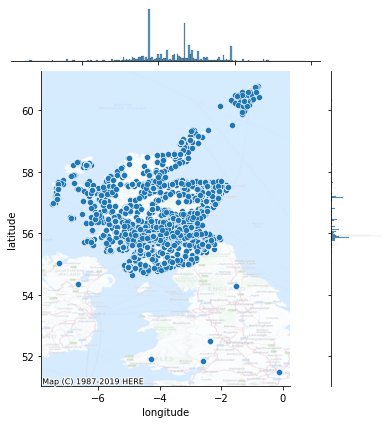

In [5]:
##let's look at the data using seaborn library
import seaborn as sns
import contextily as ctx
# Generate scatter plot

df_plot = sns.jointplot(x='longitude', y='latitude', data=df);
ctx.add_basemap(df_plot.ax_joint, crs="EPSG:4326",
    source=ctx.providers.HERE.normalDay, alpha = 0.4
);

We are going to convert `DataFrame` into `GeoDataframe` to be able to perform geospatial analysis.

The convention is to `import geopandas as gpd`

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/stable/). Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

 `geopandas.GeoDataFrame(*args, **kwargs)`
A GeoDataFrame object is a pandas.DataFrame that has a column with *geometry*


`geopandas.points_from_xy(x, y, z=None, crs=None) `  Generate `GeometryArray` of shapely Point geometries from x, y(, z) coordinates.

In [7]:
#creating geodataframe

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

In [8]:
#Let's check the GeoDataFrame

In [9]:
print(gdf.crs)

None


### Map Projections and CRS

Map projections try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data. [Source](https://docs.qgis.org/3.16/en/docs/gentle_gis_introduction/coordinate_reference_systems.html#)

![Distortions of the surface using different projections](../images/map_projections.png)
[Source](http://bl.ocks.org/vlandham/raw/9216751/)

Another example

![Another Example](../images/sinucyli-animation.gif)

[Source](https://blog.map-projections.net/the-sinucyli-projection)

We are going to set coordinates to WGS84 (lon/lat) using `set_crs` and a EPSG (European Petroleum Survey Group) code  `epsg` of the coornate system. 

In [10]:
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

epsg:4326


**More about CRS**  

- https://spatialreference.org/ref/epsg/ 
- https://proj.org/operations/projections/

### Visualisation

Let's visualise and  explore the  data on the map. Geopandas  uses matplotlib library for plotting data. Similarly to plotting `DataFrame`, to create a baic map from a `GeoDataFrame`  use ``.plot()``

**This function in GeoPandas creates a map based on the geometry columna**. 


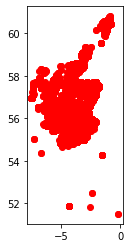

In [11]:
# plot the GeoDataFrame
gdf.plot( color='red')

plt.show()

### Open different file formats of spatial data

We are going to load boundary of Scotland to remove outliers using free OS data [BoundaryLine](https://www.ordnancesurvey.co.uk/business-government/products/boundaryline)


Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command `geopandas.read_file()`  which returns a GeoDataFrame object.
[More info](https://geopandas.org/io.html)

In [12]:
os_data=gpd.read_file('../data/district_borough_unitary.shp')

#if loading full dataset use this: 
#os_data = gpd.read_file("bdline_gb.gpkg", layer='bdline_gb district_borough_unitary')

In [13]:
#check the CRS


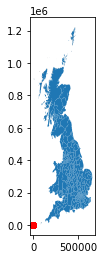

In [14]:
#Visualisation of the data
ax1 = os_data.plot()

## adding both datasets together
gdf.plot( color='red',ax = ax1)

plt.show()

Firstly, let's make the plot bigger and fix projection issue using [`to_crs`]( https://geopandas.org/reference.html#geopandas.GeoDataFrame.to_crs)

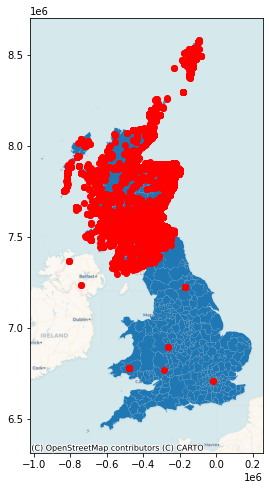

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

#Reprojecting to align with background mapping,hence using webmerkator
os_data = os_data.to_crs(epsg= 3857)

# Plot the data
os_data.plot(ax=ax)
gdf.to_crs(epsg = 3857).plot(color = 'red',ax=ax)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

**N.B.** both layers could have been projected to the same projection and then the same projection code could have been added to contextily as a parameter


```python
fig, ax = plt.subplots(figsize=(12,8)) 
#Plot the data
os_data.to_crs(epsg =4326).plot(ax=ax)
gdf.plot(color = 'red',ax=ax)
#Add basemap
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager)
```
expected output
![image](../images/ctx_4326_expected_output.png)

Full list of available backgrounds

```python
ctx.providers.keys()
```

<span style="font-family:Courier New"><span style="color:gray">'OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG' </span></span>

```python 
ctx.providers.KEYNAME.keys()
```

Example provider **HERE**

<span style="font-family:Courier New"><span style="color:gray">'normalDay', 'normalDayCustom', 'normalDayGrey', 'normalDayMobile', 'normalDayGreyMobile', 'normalDayTransit', 'normalDayTransitMobile', 'normalNight', 'normalNightMobile', 'normalNightGrey', 'normalNightGreyMobile', 'normalNightTransit', 'normalNightTransitMobile', 'reducedDay', 'reducedNight', 'basicMap', 'mapLabels', 'trafficFlow', 'carnavDayGrey', 'hybridDay', 'hybridDayMobile', 'hybridDayTransit', 'hybridDayGrey', 'pedestrianDay', 'pedestrianNight', 'satelliteDay', 'terrainDay', 'terrainDayMobile'</span></span>

### Spatial Join 

[More info](https://geopandas.org/mergingdata.html#spatial-joins)

In [16]:
#removing outliers by selecting only those inside the scotland

#Firslty let's look at the data


In [17]:
# Select Glasgow data
glasgow = os_data.loc[os_data['Name']=='Glasgow City']

In [18]:
#plot glasgow GeoDataFrame

In [19]:
#check crs

In [20]:
# Make a spatial join
join = gpd.sjoin(gdf, glasgow, how="inner", op="within")

#What do you think caused an error?

C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  


In [21]:
#Plot the joined data

In [22]:
len(join)

0

In [23]:
#examine what's inside

In [25]:
# demo that GeoDataFrame could be manipulated as DataFrame
#most popular category of jobs
join.groupby('category_label')['salary_min'].mean().reset_index().sort_values(by='salary_min')

,category_label,salary_min


### geoplot : geospatial data viz
[geoplot](https://residentmario.github.io/geoplot/index.html)

In [26]:
import geoplot

C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\geoplot\crs.py:79: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

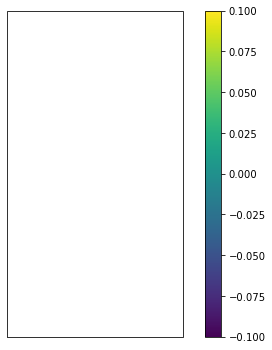

In [27]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True, 
    edgecolor='lightgray', linewidth=0.5
)

[**mapclassify**](https://pysal.org/notebooks/viz/mapclassify/intro.html)  to classify data and aplly classification schemes for Choropleth Maps 

In [28]:
import mapclassify as mc
scheme = mc.Quantiles(join['salary_min'])

C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\mapclassify\classifiers.py:887: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


ValueError: zero-size array to reduction operation minimum which has no identity

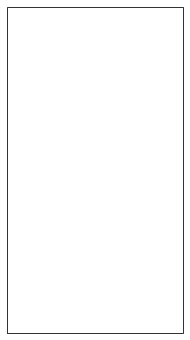

In [29]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True,
    edgecolor='lightgray', linewidth=0.5, scheme=scheme
)

### Clip

`geopandas.clip(gdf, mask, keep_geom_type=False)`
Clip points, lines, or polygon geometries to the mask extent.

Both layers must be in the same Coordinate Reference System (CRS). The gdf will be clipped to the full extent of the clip object.

If there are multiple polygons in mask, data from gdf will be clipped to the total boundary of all polygons in mask.

In [30]:
print(glasgow.crs)
print(gdf.crs)

epsg:3857
epsg:4326


In [31]:
#Let's reproject both layers to WebMerkator

gdf.to_crs(epsg=)
glasgow.to_crs(epsg =)

SyntaxError: invalid syntax (<ipython-input-31-cfe7b8524272>, line 3)

In [32]:
clipped = gpd.clip(gdf, glasgow)

C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  """Entry point for launching an IPython kernel.


In [33]:
print(len(clipped))

0


In [34]:
clipped.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,location_area_1,location_area_2,contract_type,longitude,latitude,location_area_3,location_area_4,location_area_5,scraped_date,geometry


C:\Users\qz10v\.conda\envs\lab07\lib\site-packages\geopandas\plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


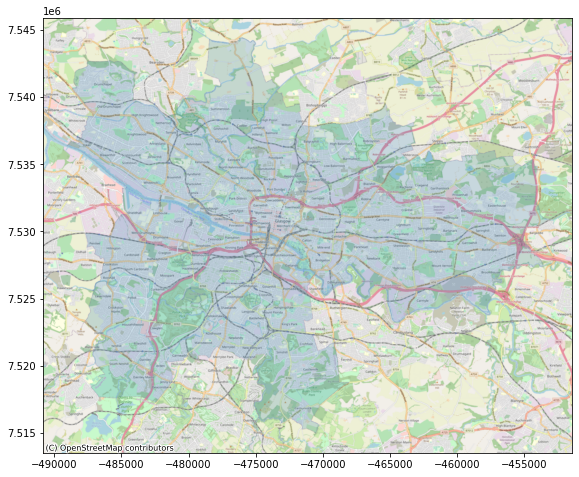

In [35]:
fig, ax1 = plt.subplots(figsize=(12,8))
# Plot the data
clipped.plot(ax=ax1)
glasgow.plot(ax=ax1,alpha=0.2 )
# Add basemap
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

In [36]:
assert len(clipped) == len(join)

The extent of a plot is the span of its axes. In `geoplot` it is formatted as a tuple of (_min_longitude, min_latitude, max_longitude, max_latitude_). 

For example, a plot covering the entire world would have a span of (-180, -180, 180, 180).

In [37]:
clipped_wgs84 = clipped.to_crs(epsg = 4326)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

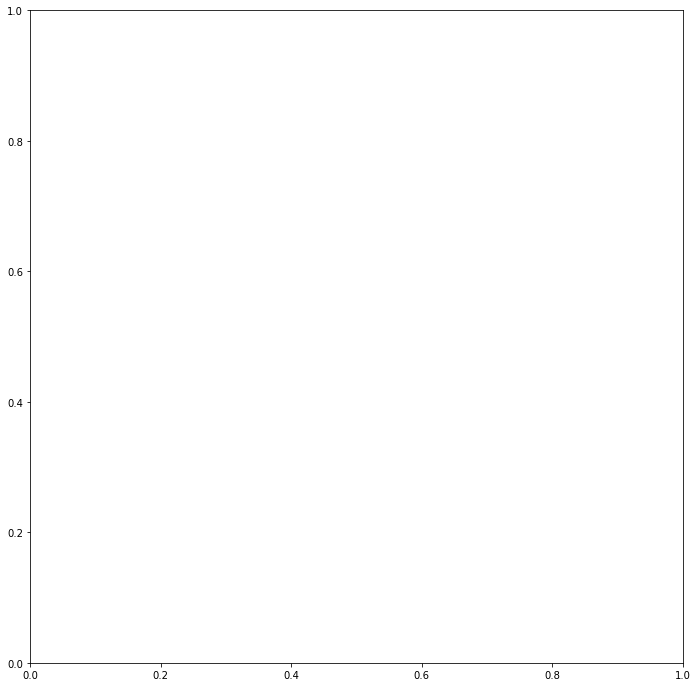

In [38]:
ax = geoplot.pointplot(
    clipped_wgs84, 
    scale='salary_min', limits=(4, 50),
    figsize=(20,12), alpha = 0.6, legend = True
)
geoplot.polyplot(glasgow.to_crs(epsg=4326), linewidth=0.3,ax=ax)

## Tranformation between GeoDataFrame and DataFrame


Data used is [DataZone boundaries](https://data.gov.uk/dataset/ab9f1f20-3b7f-4efa-9bd2-239acf63b540/data-zone-boundaries-2011) which was converted to geojson and clipped for Glasgow for this exercise.

In [ ]:
#opening dz

dz=gpd.read_file('../data/dz_glasgow.geojson')

In [ ]:
#check crs

In [ ]:
#let's double check what gdf (advert data) is

In [ ]:
#Let's convert gdf to the same crs as dz


In [ ]:
#Plot dz GeoDataFrame


In [ ]:
# Make a spatial join
dz_join = gpd.sjoin(gdf, dz, op="within")

In [ ]:
#Let's hvae a look at the data
dz.

In [ ]:
#Let's find average salary advertised per DataZone
salaries = 

In [ ]:
salaries.head()

In [ ]:
salaries.rename(columns={'salary_min':'salary_mean'},inplace= True)

In [ ]:
#Let's join GeoDataFrame dz with DataFrame salaries based on DataZone name
salaries_dz = pd.merge(salaries, dz, on='Name')

In [ ]:
#Let's have a look at the data


In [ ]:
#Let's check the type of salaries_dz


In [ ]:
salaries_dz_gdf = gpd.GeoDataFrame(salaries_dz,geometry = 'geometry')

In [ ]:
#Plot salaries_dz


In [ ]:
#Choropleth mapping (! not normalised data)
salaries_dz_gdf.plot(column='salary_mean', cmap =    
                                'YlGnBu', figsize=(20,12),   
                                 scheme='quantiles', k=5, legend =  
                                  True);

[Colourmaps](https://matplotlib.org/tutorials/colors/colormaps.html)

In [ ]:
#Cartogram with geoplot
ax2 = geoplot.cartogram(
    salaries_dz_gdf.to_crs(epsg=4326), scale='salary_mean',
    edgecolor='None', hue='salary_mean', cmap='Reds',
    figsize=(20, 12)
)

geoplot.polyplot(dz.to_crs(epsg=4326), edgecolor='grey',linewidth = 0.3, zorder=0, ax=ax2)

### Data export

`GeoDataFrame.to_file(self, filename, driver='ESRI Shapefile', schema=None, index=None, **kwargs)`

Write the GeoDataFrame to a file. By default, an ESRI shapefile is written, but any OGR data source supported by Fiona can be written.


>GeoDataFrame can contain more field types than supported by most of the file formats. For example tuples or lists can be easily stored in the GeoDataFrame, but saving them to e.g. GeoPackage or Shapefile will raise a ValueError. Before saving to a file, they need to be converted to a format supported by a selected driver.

 [More info about data outputs](https://geopandas.org/io.html)

In [ ]:
clipped.to_file("adzuna_glasgow.shp")